# GRU Model

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
df = pd.read_csv('BTC_Dataset.csv')
df['ClosingPrice'] = df['Price']/100000
df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %', 'Price'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df = df.sort_values('Date')
df.index = np.arange(0, len(df))
df

,Date,ClosingPrice
0,2017-12-01,0.108615
1,2017-12-02,0.109127
2,2017-12-03,0.112462
3,2017-12-04,0.116239
4,2017-12-05,0.116671
...,...,...
1943,2023-03-28,0.272622
1944,2023-03-29,0.283504
1945,2023-03-30,0.280295
1946,2023-03-31,0.284737


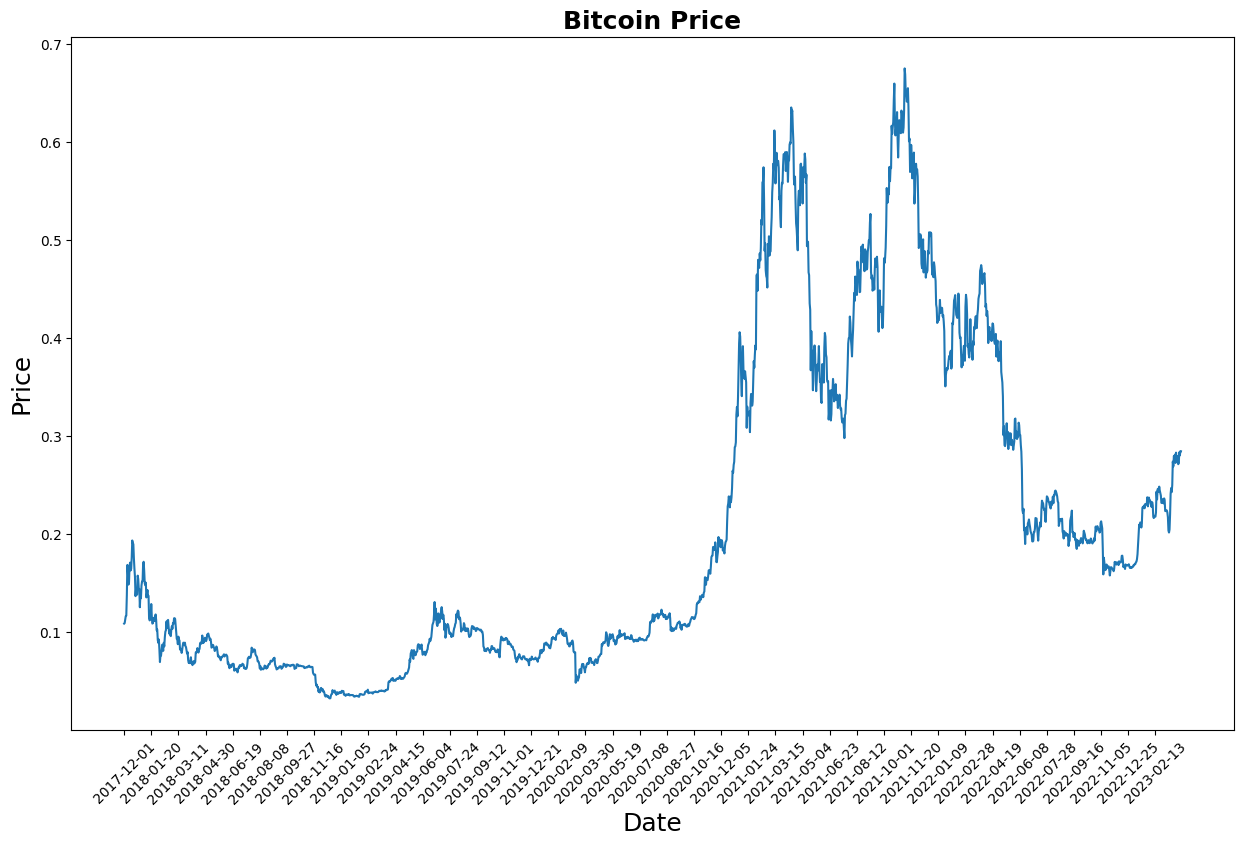

In [4]:
# Illustrated diagram
price = df[['ClosingPrice']]
plt.figure(figsize = (15,9))
plt.plot(price)
plt.xticks(range(0, df.shape[0],50), df['Date'].loc[::50],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

In [5]:
price = np.array(price)
price

array([[0.108615],
       [0.109127],
       [0.112462],
       ...,
       [0.280295],
       [0.284737],
       [0.284561]])

In [6]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size

In [7]:
train, test = price[0:train_size,:], price[train_size:len(df),:]
print(len(train), len(test))

1558 390


In [8]:
# Convert the array of values to the matrix of dataset
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [9]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1554, 3)
(1554,)
(386, 3)
(386,)


In [10]:
n_features = 1
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))
trainX.shape
testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))
testX.shape

(386, 3, 1)

In [11]:
# Define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(50, activation='relu', return_sequences=True, input_shape=(look_back, n_features)))
model.add(tf.keras.layers.GRU(50, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam())
# Fit model
model.fit(trainX, trainY, epochs=300, verbose=1)

Epoch 1/300
49/49 [==============================] - 4s 6ms/step - loss: 0.0231
Epoch 2/300
49/49 [==============================] - 0s 6ms/step - loss: 6.3241e-04
Epoch 3/300
49/49 [==============================] - 0s 6ms/step - loss: 1.8858e-04
Epoch 4/300
49/49 [==============================] - 0s 6ms/step - loss: 1.9152e-04
Epoch 5/300
49/49 [==============================] - 0s 6ms/step - loss: 1.8187e-04
Epoch 6/300
49/49 [==============================] - 0s 7ms/step - loss: 1.7266e-04
Epoch 7/300
49/49 [==============================] - 0s 6ms/step - loss: 1.8368e-04
Epoch 8/300
49/49 [==============================] - 0s 6ms/step - loss: 1.7870e-04
Epoch 9/300
49/49 [==============================] - 0s 6ms/step - loss: 1.8116e-04
Epoch 10/300
49/49 [==============================] - 0s 6ms/step - loss: 1.8320e-04
Epoch 11/300
49/49 [==============================] - 0s 6ms/step - loss: 1.7909e-04
Epoch 12/300
49/49 [==============================] - 0s 10ms/step - loss: 1.8

In [12]:
GRU_predict= model.predict(testX)
GRU_predict.reshape(-1,1)

13/13 [==============================] - 0s 3ms/step


array([[0.39279258],
       [0.3871851 ],
       [0.38751328],
       [0.3774091 ],
       [0.39578062],
       [0.39174283],
       [0.41011703],
       [0.40786618],
       [0.41672194],
       [0.42117345],
       [0.4117949 ],
       [0.4095381 ],
       [0.42272794],
       [0.4277929 ],
       [0.43897015],
       [0.4419731 ],
       [0.44432002],
       [0.46711218],
       [0.46931422],
       [0.47324634],
       [0.46934766],
       [0.45386767],
       [0.4622457 ],
       [0.45666927],
       [0.4630732 ],
       [0.4649681 ],
       [0.45364654],
       [0.43068552],
       [0.43393838],
       [0.42169428],
       [0.4269154 ],
       [0.42032152],
       [0.39442134],
       [0.40044314],
       [0.41018867],
       [0.3984285 ],
       [0.40491128],
       [0.40285653],
       [0.39632875],
       [0.40715528],
       [0.4138217 ],
       [0.4126345 ],
       [0.40404862],
       [0.39653683],
       [0.39358228],
       [0.39389396],
       [0.4032668 ],
       [0.380

In [13]:
testY = testY.reshape(-1,1)
testY.shape

(386, 1)

In [14]:
date = pd.to_datetime(df.Date)
date = date[(len(date)-len(testY)):]
date

1562   2022-03-12
1563   2022-03-13
1564   2022-03-14
1565   2022-03-15
1566   2022-03-16
          ...    
1943   2023-03-28
1944   2023-03-29
1945   2023-03-30
1946   2023-03-31
1947   2023-04-01
Name: Date, Length: 386, dtype: datetime64[ns]

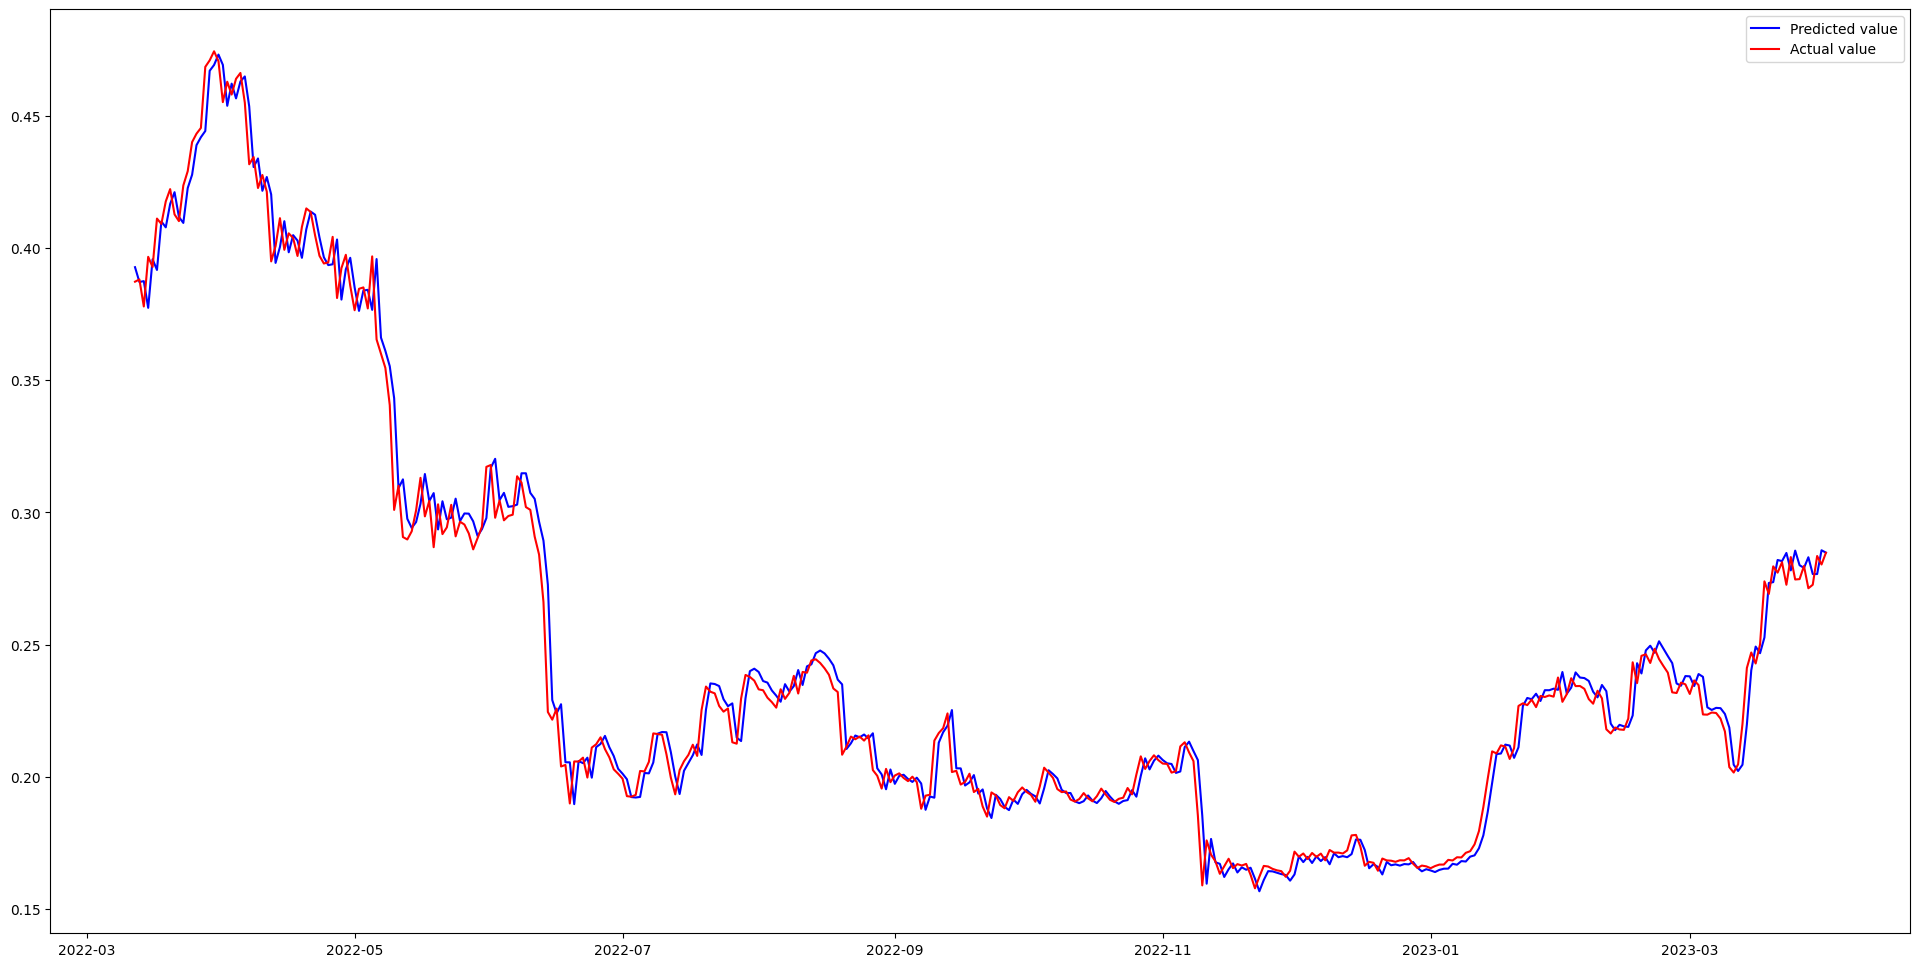

In [15]:
fig= plt.figure(figsize=(24,12))
plt.plot(date,GRU_predict,color='blue', label='Predicted value')
plt.plot(date,testY,color='red', label='Actual value')
plt.legend()
plt.show()

In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
#MAPE
mean_absolute_percentage_error(testY, GRU_predict)

2.371856079026276

In [18]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(testY, GRU_predict)
RMSE = math.sqrt(MSE)
print(RMSE)

0.008650538910119063
